<a href="https://colab.research.google.com/github/drashti310/Product_Analysis_using_Python/blob/main/Product_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# visualization

import seaborn as sns

# Importing the dataset

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/product_sales_analysis/electronics.csv')

# list of first five rows

dataset.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5,13-06-1999,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5,14-06-1999,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3,17-06-1999,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1,01-07-1999,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2,06-07-1999,Female,Portable Audio & Video,NaN,1999,NaN,0


In [10]:
# list of last five rows

dataset.tail()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
1048570,5884,415948,5,04-02-2017,Female&Male,Computers & Accessories,NaN,2015,Female,2
1048571,1236,941858,5,04-02-2017,Female&Male,Home Audio,Pyle,2011,NaN,0
1048572,2031,941454,5,04-02-2017,Female,Computers & Accessories,Logitech,2012,NaN,2
1048573,8103,941859,5,04-02-2017,Female&Male,Computers & Accessories,NaN,2017,NaN,0
1048574,6039,941860,5,04-02-2017,Female,Computers & Accessories,NaN,2015,NaN,0


In [11]:
# shape

dataset.shape

(1048575, 10)

In [12]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   item_id     1048575 non-null  int64 
 1   user_id     1048575 non-null  int64 
 2   rating      1048575 non-null  int64 
 3   timestamp   1048575 non-null  object
 4   model_attr  1048575 non-null  object
 5   category    1048575 non-null  object
 6   brand       273310 non-null   object
 7   year        1048575 non-null  int64 
 8   user_attr   144408 non-null   object
 9   split       1048575 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 80.0+ MB


In [13]:
from datetime import datetime

pd.to_datetime(dataset['timestamp'])

<ipython-input-13-9bc7023b6669>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.to_datetime(dataset['timestamp'])


0         1999-06-13
1         1999-06-14
2         1999-06-17
3         1999-01-07
4         1999-06-07
             ...    
1048570   2017-04-02
1048571   2017-04-02
1048572   2017-04-02
1048573   2017-04-02
1048574   2017-04-02
Name: timestamp, Length: 1048575, dtype: datetime64[ns]

In [14]:


dataset['brand'] = dataset['brand'].astype(str)

In [15]:
dataset['category'] = dataset['category'].astype(str)
dataset['rating'] = dataset['rating'].astype(float)
dataset['user_id'] = dataset['user_id'].astype(str)
dataset['item_id'] = dataset['item_id'].astype(str)

In [16]:
dataset.describe()

,rating,year,split
count,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.062872e+00,2.012688e+03,1.635172e-01
std,1.361620e+00,2.670931e+00,5.318743e-01
min,1.000000e+00,1.999000e+03,0.000000e+00
25%,4.000000e+00,2.012000e+03,0.000000e+00
50%,5.000000e+00,2.013000e+03,0.000000e+00
75%,5.000000e+00,2.015000e+03,0.000000e+00
max,5.000000e+00,2.018000e+03,2.000000e+00


In [17]:
dataset.nunique()

item_id         9490
user_id       941861
rating             5
timestamp       5753
model_attr         3
category          10
brand             51
year              20
user_attr          2
split              3
dtype: int64

In [19]:
dataset.duplicated().sum()

0

In [20]:
dataset.isnull().sum()

item_id            0
user_id            0
rating             0
timestamp          0
model_attr         0
category           0
brand              0
year               0
user_attr     904167
split              0
dtype: int64

#FINDING ANSWERS WITH THE DATA WE HAVE

<Axes: xlabel='rating', ylabel='count'>

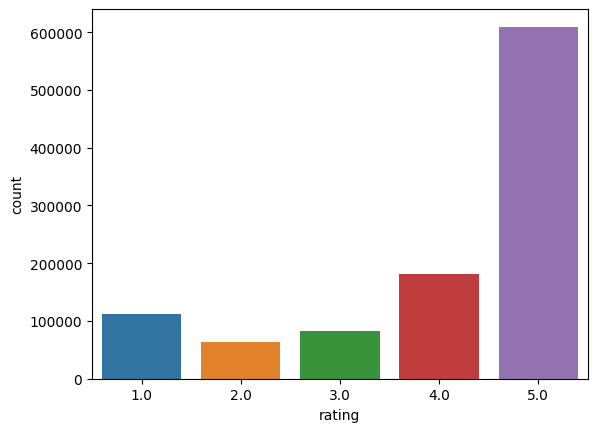

In [21]:
sns.countplot(x='rating', data=dataset)

<ipython-input-22-ba9f1d5db8c6>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataset['year'] = pd.DatetimeIndex(dataset['timestamp']).year


<Axes: xlabel='year'>

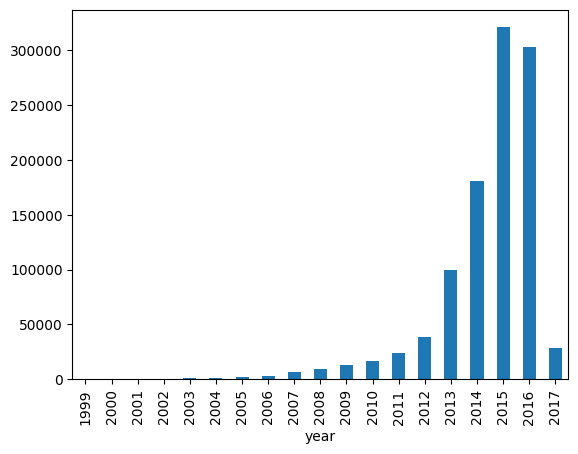

In [22]:
dataset['year'] = pd.DatetimeIndex(dataset['timestamp']).year

dataset.groupby('year')['rating'].count().plot(kind='bar')

<Axes: xlabel='brand'>

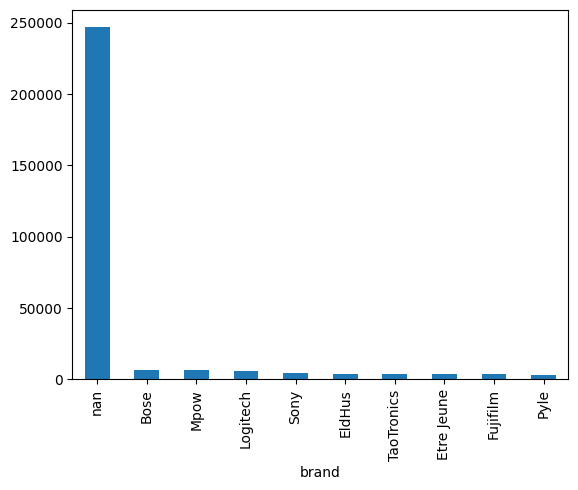

In [23]:
# what brand sold the most in 2015

dataset_2015 = dataset[dataset['year'] == 2015]

dataset_2015.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='brand'>

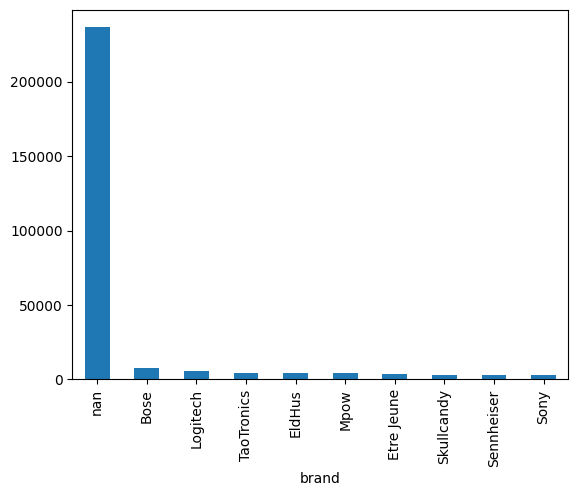

In [24]:
dataset[dataset['year'] == 2016].groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='brand'>

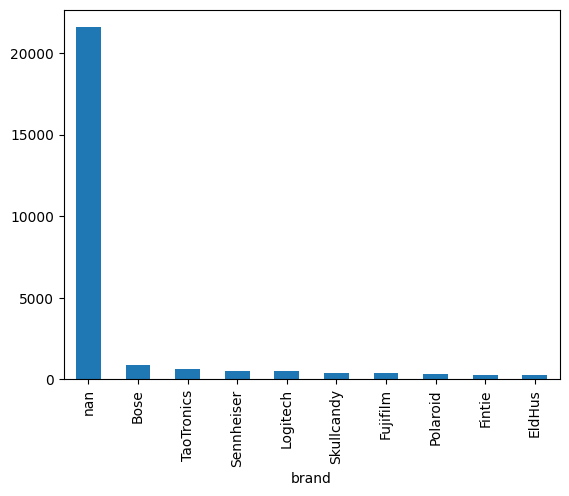

In [25]:
dataset[dataset['year'] == 2017].groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='year'>

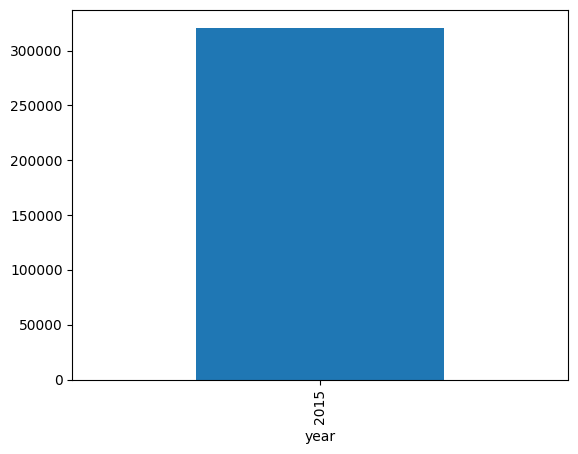

In [30]:
dataset[dataset['year'] == 2015].groupby('year')['rating'].count().plot(kind='bar')

<ipython-input-31-3c41b10b1135>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataset['month'] = pd.DatetimeIndex(dataset['timestamp']).month


<Axes: xlabel='month'>

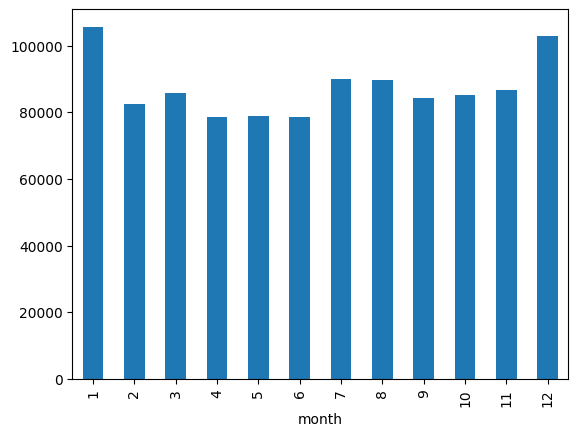

In [31]:
dataset['month'] = pd.DatetimeIndex(dataset['timestamp']).month

dataset.groupby('month')['rating'].count().plot(kind='bar')

<Axes: xlabel='brand'>

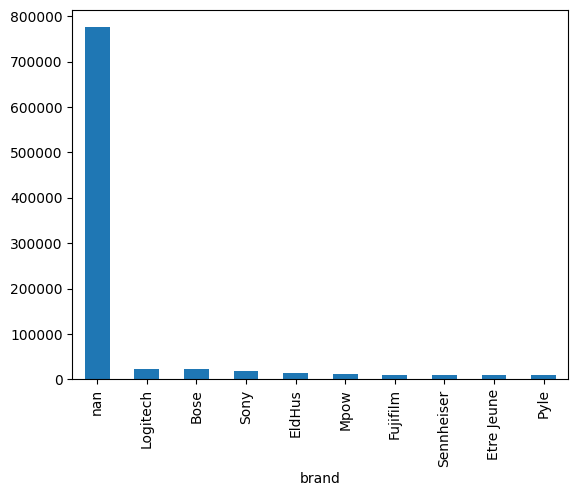

In [32]:
dataset.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='category'>

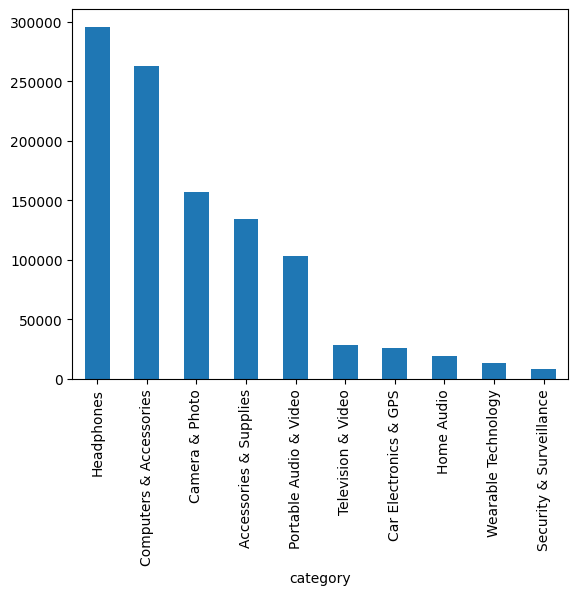

In [33]:
dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='brand'>

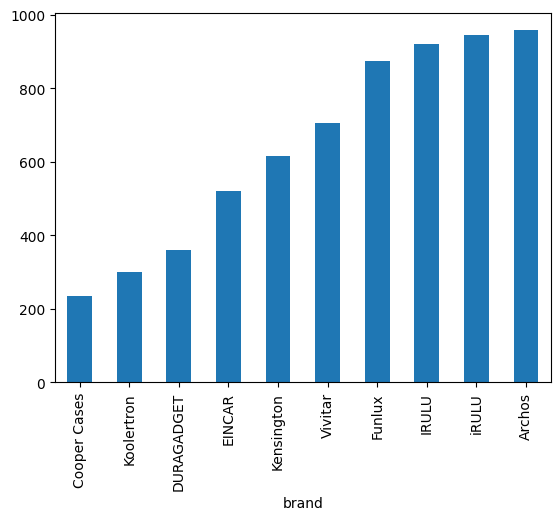

In [34]:
dataset.groupby('brand')['rating'].count().sort_values(ascending=True).head(10).plot(kind='bar')

<Axes: xlabel='category'>

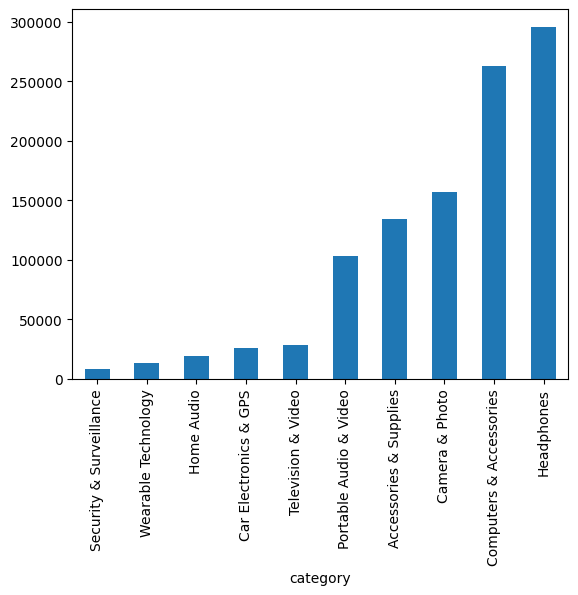

In [35]:
dataset.groupby('category')['rating'].count().sort_values(ascending=True).head(10).plot(kind='bar')

<Axes: ylabel='rating'>

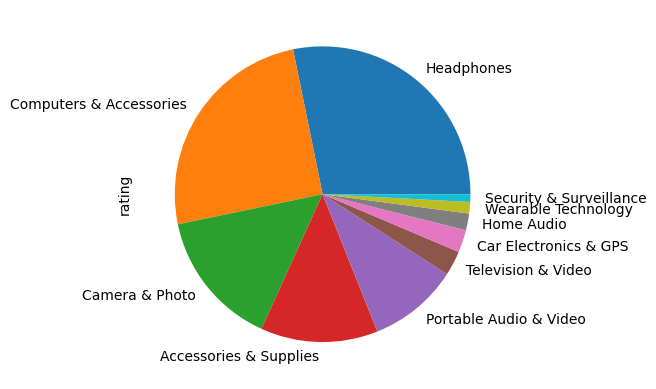

In [36]:
dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')

<Axes: ylabel='rating'>

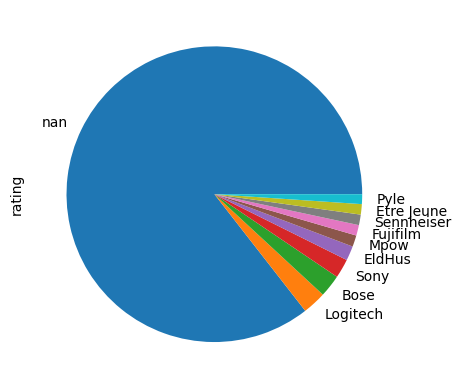

In [37]:
dataset.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')

In [38]:
# conclusion of our analysis. We can see that the year 2015 had the best sales. The month of January had the best sales.

# We can see that the brands Bose and Logitech sold the most. We can see that the category of Headphones sold the most.

# We can see that the brand name of EINCAR sold the least followed closely with DURAGADGET. We can see that the category of Security and Surveillance sold the least.